# HR & RECRUITMENT EDA Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import math
import pymysql

### Connecting python with mysql

In [4]:
dbcon = pymysql.connect(host="localhost",user= "root",password= "Mohit",database= "jobsms")

In [5]:
data =pd.read_sql_query("""select * from consolidated_search_ds;""", dbcon)

In [6]:
data

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,...,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",...,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",...,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",...,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",...,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,...,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,Senior Application Reliability Engineer,Manulife (International) Limited,-,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3207,Application Developer,PCCW Solutions Limited,Admiralty,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3208,Senior Solution Analyst - Application developm...,PCCW Solutions Limited,Tai Kok Tsui,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3209,IT Project Manager,Top Form International Limited,Wong Tai Sin,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The total number of data science jobs: 3211

In [7]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


### function for getting details of the dataframe


In [8]:
def details(data):
    print(start+'Shape of the Dataframe:'+end,data.shape,'\n')
    print(start+'Summary Of the dataframe:'+end,'\n')
    print(data.info(),'\n')
    print(start+'Statistical Summary of the Dataframe:'+end,'\n',data.describe(),'\n')
    print(start+'Checking for Null values in the dataframe:'+end,'\n',data.isnull().sum(),'\n')
    print(start+'Columns in dataframe:'+end,data.columns)

In [9]:
details(data)

Shape of the Dataframe: (3211, 30) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type     

### function for getting insigt for each column values


In [10]:
def values_in_columns(data):
    for i in data.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',data[i].nunique(),'\n')
        print('Count of each unique value \n',data[i].value_counts(),'\n')

In [11]:
values_in_columns(data)

Column Name--->Job Title
Number of Unique Values 2789 

Count of each unique value 
 Business Analyst                                                    46
System Analyst                                                      35
Analyst Programmer                                                  31
Data Analyst                                                        25
Data Scientist                                                      17
                                                                    ..
Enterprise Compute Specialist                                        1
Service Engineer (Fresh graduates are also welcome)                  1
Senior Security Consultant                                           1
Senior Analyst / Analyst (Application Development) (three posts)     1
Project Management Officer                                           1
Name: Job Title, Length: 2789, dtype: int64 

Column Name--->Company
Number of Unique Values 1232 

Count of each unique value 
 IT So

Name: Job Link, Length: 3211, dtype: int64 

Column Name--->Job Functions
Number of Unique Values 1032 

Count of each unique value 
 Not Specified                                                                                                                                                                    96
Information Technology (IT), Software Development                                                                                                                                84
Information Technology (IT), Application Specialist - Software, Software Development, Others                                                                                     71
Information Technology (IT), Application Specialist - Software, Software Development                                                                                             63
Information Technology (IT), Application Specialist - Software, IT Project Management / Team Lead, Software Development                           

### function for dropping duplicates


In [12]:
def duplicate(data):
    if data.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,data.duplicated().sum())
        data.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(data)
    else:
        print("Dataframe doesn't contains dublicate Values")
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }

In [13]:
duplicate(data)

Dataframe doesn't contains dublicate Values


### Checking is there any null values presents in our dataset if yes then replace or drop.

In [14]:
data.isna().sum().sort_values(ascending = True)

Job Title                     0
Data Source                   0
Date Scraped                  0
Date Posted                   0
Search Term                   0
Industry                      0
Job Functions                 0
Job Link                      0
Job Type                      0
Years of Experience           0
Qualification                 0
Company Website               0
Job Description               0
Company                       0
Career Level                  0
Salary                        0
Area                          0
Job Highlights                0
jobtick_analystjobs        2037
jobtick_Excel              2044
jobtick_SQL                2161
jobtick_Python             2616
jobtick_engineerjobs       2661
Employer Contact Number    2853
Upper Salary Range         2893
jobtick_avgsalary          2893
Lower Salary Range         2893
jobtick_dashboard          2918
Employer Email             3044
jobtick_scientistjobs      3131
dtype: int64

In [16]:
# replacing NaN values in Upper Salary Range with not disclose
data["Upper Salary Range"].fillna("Not Disclose", inplace = True)

In [17]:
# replacing NaN values in Lower Salary Range with not disclose
data["Lower Salary Range"].fillna("Not Disclose", inplace = True)

In [20]:
data

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,...,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,Not Disclose,Not Disclose,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",...,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,Not Disclose,Not Disclose,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",...,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,Not Disclose,Not Disclose,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",...,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,Not Disclose,Not Disclose,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",...,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,...,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,Senior Application Reliability Engineer,Manulife (International) Limited,-,None,None,Not Specified,Not Disclose,Not Disclose,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3207,Application Developer,PCCW Solutions Limited,Admiralty,None,None,Not Specified,Not Disclose,Not Disclose,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3208,Senior Solution Analyst - Application developm...,PCCW Solutions Limited,Tai Kok Tsui,None,None,Not Specified,Not Disclose,Not Disclose,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3209,IT Project Manager,Top Form International Limited,Wong Tai Sin,None,None,Not Specified,Not Disclose,Not Disclose,Not Specified,Not Specified,...,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Interpretion


    Total Number of companies = 1232

    Total number of industry = 51

    Total Number of Job Type = 41

    total entry level jobs = 1328

    total number of middle level job =1000

    total number of senior level job = 883

    Total Data Scientist jobs = 2490

    total Data Analyst jobs= 502

    total Business Intelligence jobs= 137

    total Data Engineer jobs = 55

    total Machine Learning Engineer = 27



In [21]:
data.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

### graphs plotting

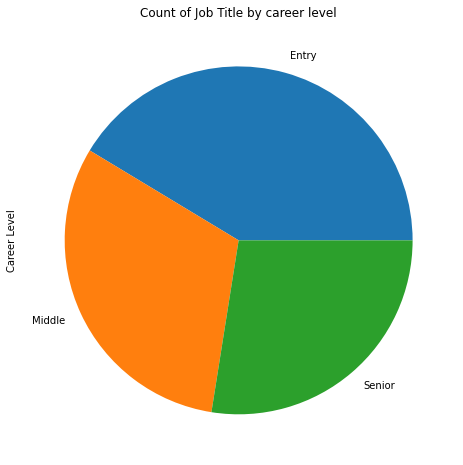

In [23]:
data['Career Level'].value_counts().plot(kind='pie',figsize=(12,8),title='Count of Job Title by career level');

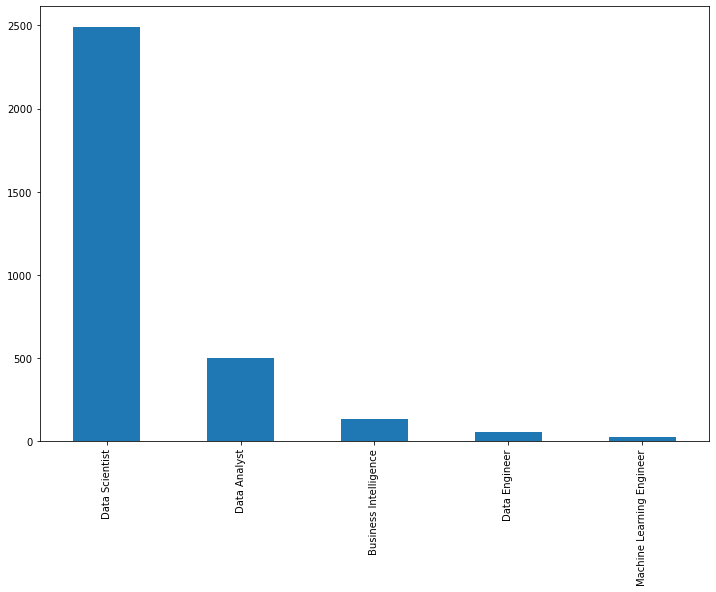

In [25]:
data['Search Term'].value_counts().plot(kind = 'bar', figsize=(12,8));

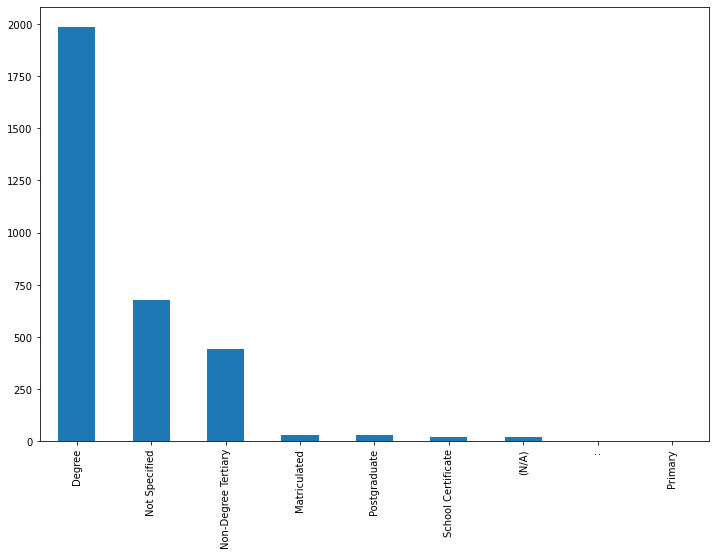

In [27]:
data['Qualification'].value_counts().plot(kind = 'bar', figsize=(12,8));

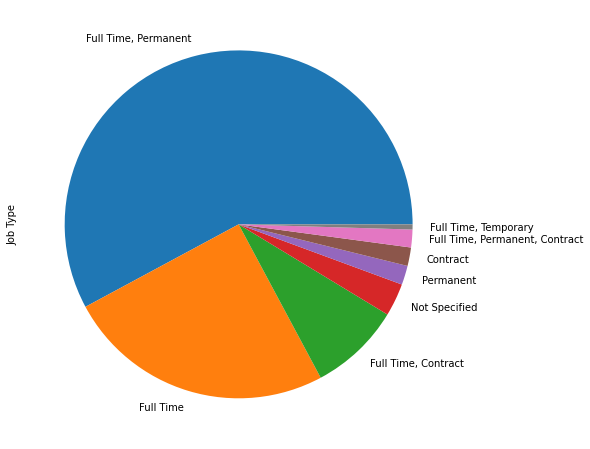

In [29]:
data['Job Type'].value_counts()[:8].plot(kind='pie',figsize=(12,8));

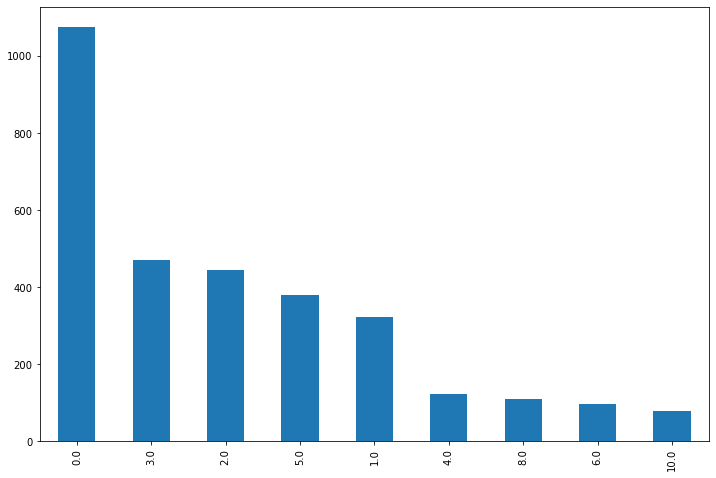

In [30]:
data['Years of Experience'].replace(-1,0).value_counts()[:10].plot.bar(figsize=(12,8));

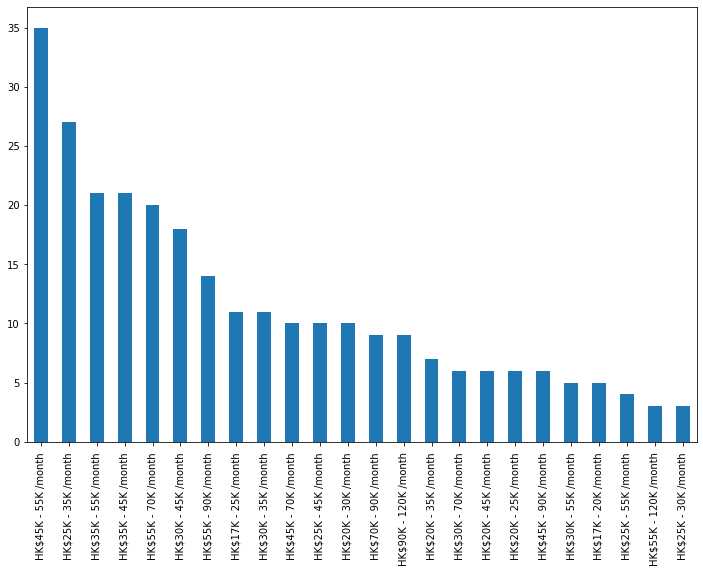

In [31]:
data['Salary'].value_counts()[1:25].plot.bar(figsize=(12,8));

In [32]:
#checking the columns name again
data.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

saving the dataset into csv file

In [36]:
data.to_csv("HR & Recruitment.csv")